Hackathon: Wine Prediction


---

We are solving a classification problem using the Random Forest Classification Model
(Supervised Machine Learning model that combines the output of multiple tress into a single tree)




In [23]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [24]:
# Load data intos pandas Dataframe
file_path = 'wine-quality-white-and-red.csv'
df_source = pd.read_csv(file_path)
df = df_source.copy()
df.shape

(6497, 13)

In [25]:
# Show the columns of the data set and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
# Show first 5 rows of dataset
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


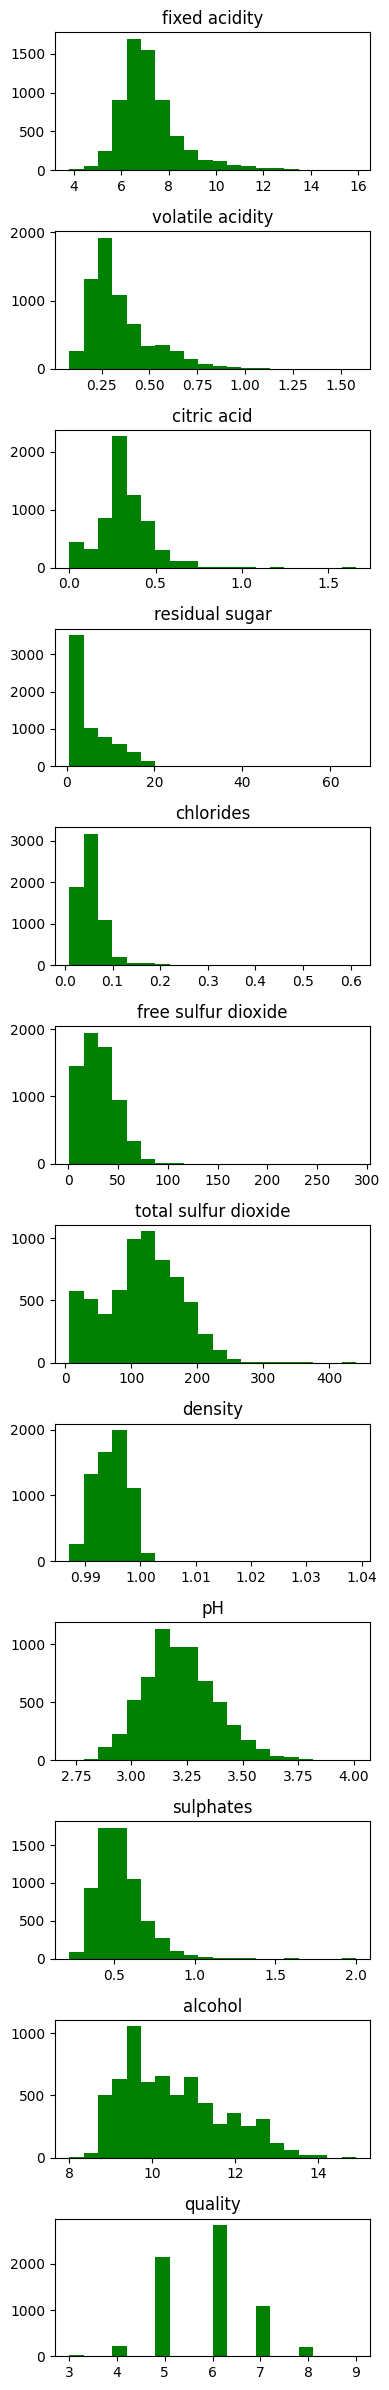

In [28]:
# Data Exploration
# Plotting histograms of each of the numeric columns
# Histograms are plots that show frequency distributions of how often values occur. 
# This will show you the shape/distribution of the data
n_bins = 20
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
n_plots = len(numerical_features)

fig, axes = plt.subplots(n_plots, 1, figsize=(4, 2 * n_plots), tight_layout=True)
for i in range(len(numerical_features)):
  axes[i].hist(df[numerical_features[i]], n_bins, histtype='bar', color='green')
  axes[i].set_title(numerical_features[i])

fig.tight_layout()
plt.show()




In [29]:
# Data processing 
# We will create two new columns red_wine and white_wine
# For the red_wine column, if type="red" then "1" else "0"
# For the white_wine column, if type="white" then "1" else "0"
# This is a pre-processing step when working with categorical data.
df['red_wine'] = df['type'].apply(lambda x: 1 if x == 'red' else 0)
df['white_wine'] = df['type'].apply(lambda x: 1 if x == 'white' else 0)

df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,white_wine
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


Total Red Wine: 1599
Total White Wine: 4898


Text(0.5, 0, 'Count')

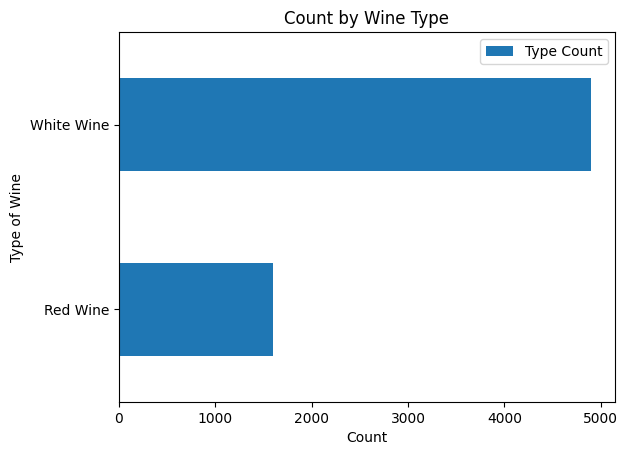

In [30]:
# Get count of red wine and white wine
total_red = df['red_wine'].sum()
total_white = df['white_wine'].sum()
print("Total Red Wine: {}".format(total_red))
print("Total White Wine: {}".format(total_white))

# Plot red wine vs white wine bar chart
plot_type = pd.DataFrame({"Type Count": [total_red, total_white]}, index=["Red Wine", "White Wine"])
plot_type.plot(kind="barh")
plt.title("Count by Wine Type")
plt.ylabel("Type of Wine")
plt.xlabel("Count")

In [31]:
# Normalize numerical features of the data set
# Use Z-score normalization when :
# When you have a few outliers but nothing too extreme
# handles outliers, but does not produce normalized data with the exact same scale.


# Min-max scaling is a good idea when:
# 1. You know the approximate upper and lower bounds on your data with few or no outliers. (does not handle outliers well)
# 2. Your data is approximately uniformly distributed across that range.
features_to_normalize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for feature in features_to_normalize:
  df[feature] = zscore(df[feature])

In [32]:
# Split the data into Features (X) and Target (y)
X = df.drop(['quality','type'],axis=1)
y = df['quality']

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
# Train the model using Random Forest (supervised machine learning algorithm)

# Create an instance of the Random Forest Model
rf = RandomForestClassifier()

# Fit the Model to our training data set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Use the Model we have trained using the training set to predict the test set
y_pred = rf.predict(X_test)

Accuracy: 0.6815384615384615



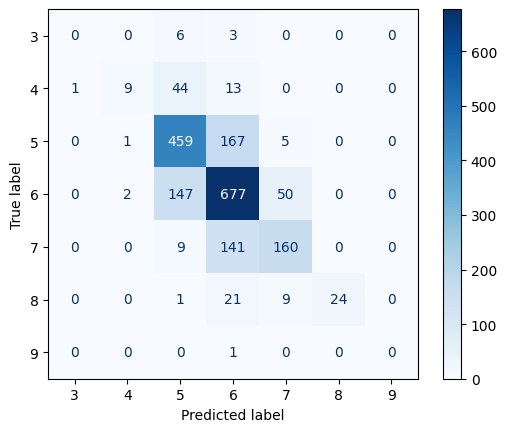

In [36]:
# Evaluation Metrics

# Evaluate the Model by checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}\n".format(accuracy))

# Evaluate the Model with a Confusion Matrix
y_pred_df = pd.DataFrame(y_pred,columns=['predictions'])
labels = np.unique(np.concatenate([y_test.values, y_pred_df['predictions'].values]))
ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues
    )


alcohol                 0.124015
volatile acidity        0.101101
density                 0.100407
total sulfur dioxide    0.090441
free sulfur dioxide     0.086761
chlorides               0.086207
sulphates               0.086206
residual sugar          0.084231
pH                      0.081170
citric acid             0.080142
fixed acidity           0.073395
white_wine              0.003121
red_wine                0.002803
dtype: float64


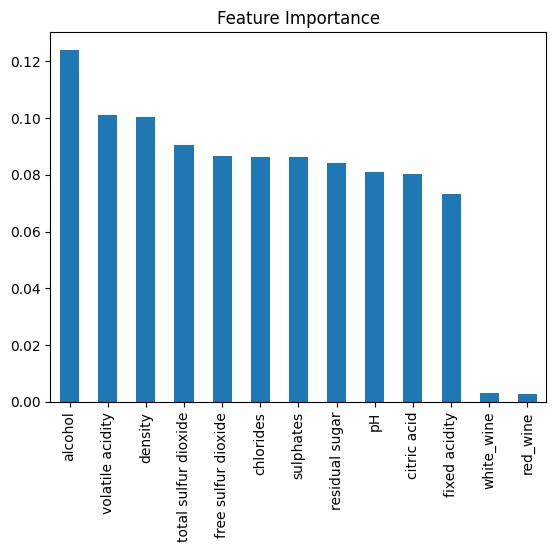

In [37]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

# Plot a simple bar chart
feature_importances.plot.bar(title='Feature Importance');

The top 3 features/variables the wine makers should focus on to achieve better wine quality are: 

1.   alcohol
2.   density
3.   volatile acidity

In [38]:
# Using the Model trained on the Portuguese winery
# we can apply it to Spain's data set
file_path_spain = 'newwine-data-v02.csv'
df_source_spain = pd.read_csv(file_path_spain)
df_spain = df_source_spain.copy()
df_portugal = df_source.copy()
df_spain.shape

(20, 12)

In [39]:
df_spain.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,red,11.00,0.5950,0.575,2.15,0.1370,7.5,31.5,1.000100,3.205,0.600,8.700
1,red,7.95,1.3000,0.010,2.75,0.1105,5.5,10.0,0.996840,3.490,0.445,10.950
2,red,7.35,0.5700,0.055,3.00,0.0790,11.5,35.5,0.996500,3.375,0.490,9.000
3,red,7.60,0.5525,0.200,1.70,0.0810,18.0,71.0,0.996525,3.275,0.775,9.075
4,red,6.25,0.5000,0.160,8.60,0.0555,8.5,66.5,0.995300,3.375,0.560,11.650


In [40]:
# Data processing 
# We will create two new columns red_wine and white_wine
# For the red_wine column, if type="red" then "1" else "0"
# For the white_wine column, if type="white" then "1" else "0"
df_spain['red_wine'] = df_spain['type'].apply(lambda x: 1 if x == 'red' else 0)
df_spain['white_wine'] = df_spain['type'].apply(lambda x: 1 if x == 'white' else 0)

In [41]:
# Normalize numerical features of the data set
######## use the normalization scale from portuguese and apply it to the spain data
features_to_normalize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for feature in features_to_normalize:
  df_spain[feature] = zscore(df_portugal[feature])

In [42]:
df_spain.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine,white_wine
0,red,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,1,0
1,red,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,1,0
2,red,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,1,0
3,red,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,1,0
4,red,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,1,0


In [43]:
# Use the Model we have trained using the Portuguese winery data to predict Spain's wine quality
X_spain = df_spain.drop(['type'],axis=1)
y_pred_spain = rf.predict(X_spain)

In [44]:
print(y_pred_spain)

[6 6 6 6 6 6 6 6 6 6 5 5 5 7 5 7 6 8 6 5]
